In [ ]:
from google.colab import files
upload= files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Mall_Customers.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
sc=StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


K = 4, Silhouette Score = 0.2901
K = 5, Silhouette Score = 0.2719
K = 6, Silhouette Score = 0.3348
K = 7, Silhouette Score = 0.3457
K = 8, Silhouette Score = 0.3728
K = 9, Silhouette Score = 0.3876
K = 10, Silhouette Score = 0.4208
K = 11, Silhouette Score = 0.4275
K = 12, Silhouette Score = 0.4257
K = 13, Silhouette Score = 0.4240
K = 14, Silhouette Score = 0.4128
K = 15, Silhouette Score = 0.4160
K = 16, Silhouette Score = 0.4294
K = 17, Silhouette Score = 0.4305
K = 18, Silhouette Score = 0.4345
K = 19, Silhouette Score = 0.4317
K = 20, Silhouette Score = 0.4262
K = 21, Silhouette Score = 0.4060
K = 22, Silhouette Score = 0.3962
K = 23, Silhouette Score = 0.3995
K = 24, Silhouette Score = 0.3929
K = 25, Silhouette Score = 0.4016
K = 26, Silhouette Score = 0.4011
K = 27, Silhouette Score = 0.4109
K = 28, Silhouette Score = 0.4067
K = 29, Silhouette Score = 0.3955
K = 30, Silhouette Score = 0.3797
K = 31, Silhouette Score = 0.3889
K = 32, Silhouette Score = 0.3846
K = 33, Silhouette S

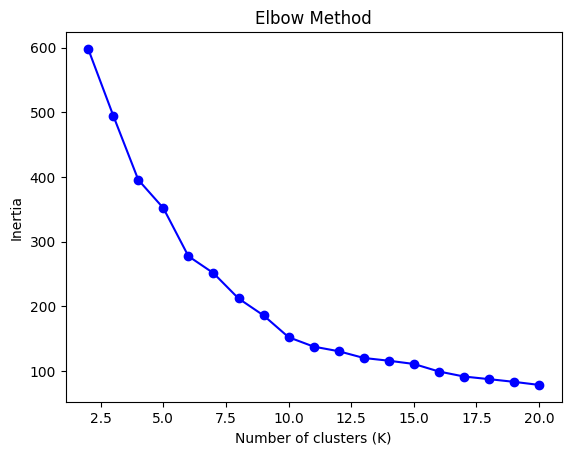

In [ ]:
best_k = 0
best_score = -1
scores = []

for k in range(4, 110):  # Trying K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds)
    scores.append(score)

    print(f"K = {k}, Silhouette Score = {score:.4f}")

    # Track the best K
    if score > best_score:
        best_k = k
        best_score = score

print(f"\n🔍 Best K: {best_k} with Silhouette Score: {best_score:.4f}")
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

df['Cluster'] = clusters
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,10
1,1.128152,-1.281035,-1.738999,1.195704,1
2,-0.886405,-1.352802,-1.700830,-1.715913,2
3,-0.886405,-1.137502,-1.700830,1.040418,8
4,-0.886405,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,3
196,-0.886405,0.441365,2.497807,-0.861839,9
197,1.128152,-0.491602,2.497807,0.923953,11
198,1.128152,-0.491602,2.917671,-1.250054,11


In [ ]:
score = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4344836947875263


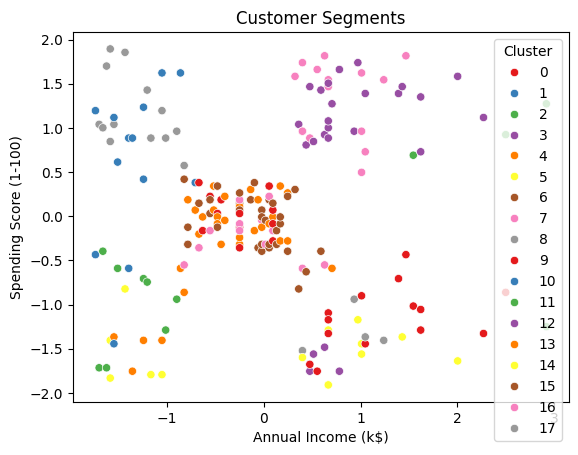

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()


In [ ]:
best_k = 0
best_score = -1
scores = []

for k in range(4, 110):  # Trying K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds)
    scores.append(score)

    print(f"K = {k}, Silhouette Score = {score:.4f}")

    # Track the best K
    if score > best_score:
        best_k = k
        best_score = score

print(f"\n🔍 Best K: {best_k} with Silhouette Score: {best_score:.4f}")

K = 4, Silhouette Score = 0.2901
K = 5, Silhouette Score = 0.2719
K = 6, Silhouette Score = 0.3348
K = 7, Silhouette Score = 0.3457
K = 8, Silhouette Score = 0.3728
K = 9, Silhouette Score = 0.3876
K = 10, Silhouette Score = 0.4208
K = 11, Silhouette Score = 0.4275
K = 12, Silhouette Score = 0.4257
K = 13, Silhouette Score = 0.4240
K = 14, Silhouette Score = 0.4128
K = 15, Silhouette Score = 0.4160
K = 16, Silhouette Score = 0.4294
K = 17, Silhouette Score = 0.4305
K = 18, Silhouette Score = 0.4345
K = 19, Silhouette Score = 0.4317
K = 20, Silhouette Score = 0.4262
K = 21, Silhouette Score = 0.4060
K = 22, Silhouette Score = 0.3962
K = 23, Silhouette Score = 0.3995
K = 24, Silhouette Score = 0.3929
K = 25, Silhouette Score = 0.4016
K = 26, Silhouette Score = 0.4011
K = 27, Silhouette Score = 0.4109
K = 28, Silhouette Score = 0.4067
K = 29, Silhouette Score = 0.3955
K = 30, Silhouette Score = 0.3797
K = 31, Silhouette Score = 0.3889
K = 32, Silhouette Score = 0.3846
K = 33, Silhouette S